In [4]:
%pylab inline
from scipy.stats import circmean

Populating the interactive namespace from numpy and matplotlib


In [5]:
# Function definition
def Velocity(Vvec,L):
    V0=Vvec[-2]
    V1=Vvec[-1]
    max0=argmax(V0)
    max1=argmax(V1)
    if max1 < max0:
        max1=max1+len(V0)
    v=L*(max1-max0)/len(V0)
    return v

def circular_mean(weights, angles):
    x = y = 0.
    for angle, weight in zip(angles, weights):
        x += math.cos(math.radians(angle)) * weight
        y += math.sin(math.radians(angle)) * weight

    mean = math.degrees(math.atan2(y, x))
    return mean

def center_of_mass(V,pfc,L):
    #index=(pfc*N/L).astype(int)
    #sortedV=V[np.argsort(index)]
    phases=pfc*2*math.pi/L
    m=circular_mean(V,phases)*L/(2*math.pi)
    return m

def sortV(V,pfc,N,L):
    index=(pfc*N/L).astype(int)
    sortedV=V[np.argsort(index)]
    return V

def robustVelocity(Vvec,pfc,L):
    V0=Vvec[2]
    V1=Vvec[3]
    m0=center_of_mass(V0,pfc,L)
    m1=center_of_mass(V1,pfc,L)
    if m1 < m0:
        m1=m1+L
    v=(m1-m0)
    return v

# trajectory dependent velocity
def sortedVelocity(Vvec,pfc,N,L):
    
    index=(pfc*N/L).astype(int)
    V0=Vvec[2]
    sortedV0=V0[np.argsort(index)]
    V1=Vvec[3]
    sortedV1=V1[np.argsort(index)]
    
    max0=argmax(sortedV0)
    max1=argmax(sortedV1)
    if max1 < max0:
        max1=max1+len(sortedV0)
    v=L*(max1-max0)/len(sortedV0)
    return v

# Trajectory Dependence

In [3]:
# Load data
pfc=load("multispeed_trajectories/pfc.npy")
gammas=load("multispeed_trajectories/gammas.npy")
Vs=load("multispeed_trajectories/Vdynamics.npy")
J=load("multispeed_trajectories/J.npy")
L=10
N=1000

In [6]:
speed=np.zeros(len(gammas))
for i in range(len(gammas)):
    speed[i]=robustVelocity(Vs[i],pfc[i],L)

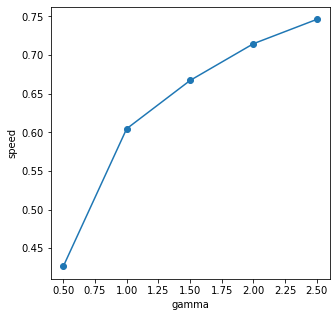

In [7]:
figure(figsize(5,5))
ylabel("speed")
xlabel("gamma")
scatter(gammas,speed)
plot(gammas,speed)
#savefig("trajectory_dependence.png")

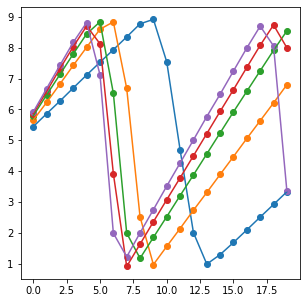

In [8]:
start=0
stop=20
for i in range(len(gammas)):
    time=range(len(Vs[i]))
    com=np.zeros(len(time))
    for j in range(len(com)):
        com[j]=center_of_mass(Vs[i][j],pfc[i],L)
    plot(time[start:stop],com[start:stop])
    scatter(time[start:stop],com[start:stop])
    

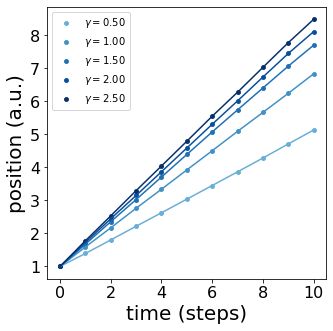

In [9]:
figure(figsize=(5,5))
xlabel("time (steps)",fontsize=20)
ylabel("position (a.u.)",fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

colors=cm.Blues(np.linspace(0.5,1,5))
start=14
stop=25
time=range(len(Vs[i]))
com=np.zeros(len(time))
for j in range(len(com)):
    com[j]=center_of_mass(Vs[0][j],pfc[0],L)
plot(range(stop-start),com[start:stop]-com[start]+1,color=colors[0])
scatter(range(stop-start),com[start:stop]-com[start]+1,s=15,color=colors[0],label=r"$\gamma={:.2f}$".format(gammas[0]))

start=9
stop=20
time=range(len(Vs[i]))
com=np.zeros(len(time))
for j in range(len(com)):
    com[j]=center_of_mass(Vs[1][j],pfc[1],L)
plot(range(stop-start),com[start:stop]-com[start]+1,color=colors[1])
scatter(range(stop-start),com[start:stop]-com[start]+1,s=15,color=colors[1],label=r"$\gamma={:.2f}$".format(gammas[1]))

start=9
stop=20
time=range(len(Vs[i]))
com=np.zeros(len(time))
for j in range(len(com)):
    com[j]=center_of_mass(Vs[2][j],pfc[2],L)
plot(range(stop-start),com[start:stop]-com[start]+1,color=colors[2])
scatter(range(stop-start),com[start:stop]-com[start]+1,s=15,color=colors[2],label=r"$\gamma={:.2f}$".format(gammas[2]))

start=8
stop=19
time=range(len(Vs[i]))
com=np.zeros(len(time))
for j in range(len(com)):
    com[j]=center_of_mass(Vs[3][j],pfc[3],L)
plot(range(stop-start),com[start:stop]-com[start]+1,color=colors[3])
scatter(range(stop-start),com[start:stop]-com[start]+1,s=15,color=colors[3],label=r"$\gamma={:.2f}$".format(gammas[3]))

start=7
stop=18
time=range(len(Vs[i]))
com=np.zeros(len(time))
for j in range(len(com)):
    com[j]=center_of_mass(Vs[4][j],pfc[4],L)
plot(range(stop-start),com[start:stop]-com[start]+1,color=colors[4])
scatter(range(stop-start),com[start:stop]-com[start]+1,s=15,color=colors[4],label=r"$\gamma={:.2f}$".format(gammas[4]))

legend()
#savefig("speed_trajectory_dependence.svg")